
# Project: Investigate a Dataset (Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We are going to look at movie data for analysis. It is the data from IMDB about movies. There is data about several movies from many years. Details like their popularity score, vote count, genre, budget, revenue, actor roster and more are given. I will analyze this data and learn more about movies, and hopefully will get some insight into the film industry trends over the years.

In [2]:
# Using this cell to set up import statements for all of the packages that I plan to use.
"""
Created on Wed Nov 15 12:22:41 2017

@author: poonam
"""
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#change your pathname here
#DIR = "Your Path Here"

DIR = "/Users/poonam/Documents/Poonam/DAND/DA-Project1/"
os.chdir(DIR)
print('Your current working directory: \n', os.getcwd())
print('\nContents in your curent working directory: \n', os.listdir("."))

Your current working directory: 
 /Users/poonam/Documents/Poonam/DAND/DA-Project1

Contents in your curent working directory: 
 ['.DS_Store', 'DA-Project-MovieDataFinal.ipynb', 'DA-Project-MovieDataNew.py', 'DA-Project-MovieDataFinal-Rough.ipynb', 'DA-Project', '.ipynb_checkpoints', 'InvestigateDataset(MovieData)Poonam.ipynb', 'tmdb-movies.csv', 'DA-Project-MovieDataOld.py']


<a id='wrangling'></a>
## Data Wrangling

### General
Before we can get started on the fun stuff, we have to read in and examine our data. Let's trim and clean our dataset to make sure that this is good enough for our analysis.
Let's get started loading in the data!

In [3]:
# Load your data and print out a few lines.
# Read the csv file and create a DataFrame 

movie_data_df = pd.read_csv('tmdb-movies.csv')

In [4]:
# Describe the dataframe to see if its created properly, and see other details.

print (movie_data_df.describe()) #Status about each column

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

In [5]:
# I will check the number of rows first 
print (movie_data_df.count())

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64


### Data Cleaning
From the above output I see that not all the columns have equal rows. The column 'imdb_id' has one row less, column 'homepage' has just 2936 values against the total of 10866, and similarly columns 'keywords' amd 'production_companies' have lesser values.

These are just the details related columns, and none of these are numeric value columns. My first anlysis is going to be on budget and revenue patterns over the years. As these two columns do not have any missing values, I wouldn't worry for data cleaning part for now.

<a id='eda'></a>
## Exploratory Data Analysis

### Correlation between budget and revenue
I am interested to know if there is any relation between budget and revenue.

### Group by Release Year
I want to check the max and min values of budget and revenue in a year. 
As there are many movies in a release year, I would first consolidate the budget and revenue values for a release year
and then plot the graph. I will use the groupby function on release year for that.

release_year
1960    22056948
1961    46137000
1962    54722126
1963    73331500
1964    39483161
Name: budget, dtype: int64


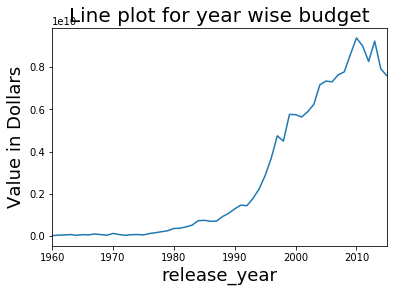

release_year
1960    145005000
1961    337720188
1962    215579846
1963    187404989
1964    340981782
Name: revenue, dtype: int64


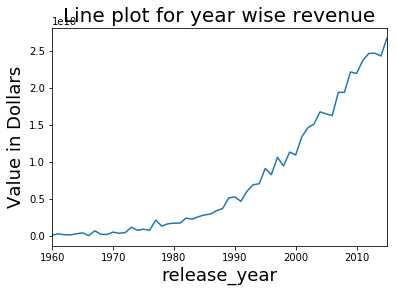

In [20]:
grouped_by_year_budget =  ((movie_data_df.groupby('release_year')).sum()['budget'])
print (grouped_by_year_budget.head())
plt.title('Line plot for year wise budget', fontsize=20)
plt.xlabel('Budget', fontsize=18)
plt.ylabel('Value in Dollars', fontsize=18)
grouped_by_year_budget.plot()
plt.show()

grouped_by_year_revenue =  ((movie_data_df.groupby('release_year')).sum()['revenue'])
print (grouped_by_year_revenue.head())
plt.title('Line plot for year wise revenue', fontsize=20)
plt.xlabel('Revenue', fontsize=18)
plt.ylabel('Value in Dollars', fontsize=18)
grouped_by_year_revenue.plot()
plt.show()

We see that in the above output, the budget and revenue are increasing year on year. 
Does this mean more the budget more the revenue?
I'd like to investigate this further.

In the next cell lets find out the release year for max and min budget and revenues.
Here again I would use the group by function on release year, to consolidate the budget and revenue values for a release year.

In [6]:
# I want to check the max and min values of budget and revenue in a year. 
# As there are many movies in a release year, I would first consolidate the budget and revenue values for a release year
# and then plot the graph. I will use the groupby function on release year for that.

release_year_for_min_budget= ((movie_data_df.groupby('release_year')).sum()['budget'].argmin())
release_year_for_min_revenue=  ((movie_data_df.groupby('release_year')).sum()['revenue'].argmin())
print ('Budget was minimum in year', release_year_for_min_budget)
print ('Revenue was minimum in year', release_year_for_min_revenue)

release_year_for_max_budget= ((movie_data_df.groupby('release_year')).sum()['budget'].argmax())
release_year_for_max_revenue=  ((movie_data_df.groupby('release_year')).sum()['revenue'].argmax())
print ('Budget was maximum in year', release_year_for_max_budget)
print ('Revenue was maximum in year', release_year_for_max_revenue)

Budget was minimum in year 1960
Revenue was minimum in year 1966
Budget was maximum in year 2010
Revenue was maximum in year 2015


Our previous assumption was that whenever budget is high the revenue is high. From the above output we see that the release year for max and min budget and the corresponding release year for max and min revenue do not match. However we see that minimum and max are very closely tied to time. This also points to something else that's shown by our charts above, as we had seen lower budgets and revenues in the early years and higher budgets and revenues in later years. 

Our line plot had shown a pretty steady increase in both budget and revenue year on year, so there is a correleation, but not a causation.
Lets calculate the correlation coefficient between these 2 values to be more clear.

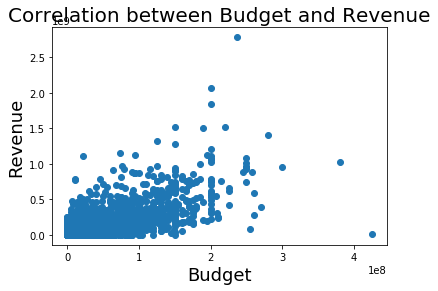

In [7]:
chart = plt.scatter(x=movie_data_df.budget, y=movie_data_df.revenue) #scatter chart between budget and revenue
plt.title('Correlation between Budget and Revenue', fontsize=20)
plt.xlabel('Budget', fontsize=18)
plt.ylabel('Revenue', fontsize=18)
plt.show()
# Scatter chart shows a pretty strong relation between budget and revenue 

In [9]:
# Write code to get the correlation coefficient between budget and revenue to acertain a relation b/w these 2 values
# A positive correlation nearer to 1 would mean a strong correlation. In this case it is .7

def correlation(x,y):
    std_x= (x-x.mean())/x.std(ddof=0)
    std_y= (y-y.mean())/y.std(ddof=0)
    return (std_x * std_y).mean()

print (correlation (movie_data_df.budget, movie_data_df.revenue))

0.7349006819076017


The above correlation coefficient is positive and close to 1, so it means revenue and budget are strongly related. Its a good sign for film makers atleast that films that spend more on the making, eventually make profit. It would be interesting to know which is that one movie where the budget to revenue ratio is the minimum, that is where a huge amount was spent but the earnings were not proportionate. Though we are not working on this any further here, let's know something about the poupular movies.

### Genres of the most and least popular movies so far

So First I would get the max and min value of popularity, then I would see their corresponding titles.

In [26]:
# Check the name of the movie that got max popularity.
print (movie_data_df['popularity'].max())
index_of_max_popularity = (movie_data_df['popularity'].argmax())
print (index_of_max_popularity)
title_of_most_popular = movie_data_df.loc[index_of_max_popularity,'original_title']
genre_of_most_popular = movie_data_df.loc[index_of_max_popularity,'genres']
print (title_of_most_popular)
print (genre_of_most_popular)

32.985763
0
Jurassic World
Action|Adventure|Science Fiction|Thriller


In [27]:
# Check the name of the movie that got min popularity.
print (movie_data_df['popularity'].min())
index_of_min_popularity = (movie_data_df['popularity'].argmin())
print (index_of_min_popularity)
title_of_least_popular = movie_data_df.loc[index_of_min_popularity,'original_title']
genre_of_least_popular = movie_data_df.loc[index_of_min_popularity,'genres']
print (title_of_least_popular)
print (genre_of_least_popular)

6.5e-05
6181
North and South, Book I
Drama|History|Western


How about seeing the top five most and least popular movies in the entire set, and finding their corresponding genres.

In [11]:
movie_data_df.sort_values('popularity', ascending=False, inplace=True)
movie_data_df.reset_index(inplace=True)
print("Top Five Movies by Popularity:\n", movie_data_df[['original_title','genres', 'popularity', 'release_year']].head()) 
print("\n")
print("Bottom Five Movies by Popularity:\n", movie_data_df[['original_title','genres', 'popularity', 'release_year']].tail()[::-1])

Top Five Movies by Popularity:
             original_title                                     genres  \
0           Jurassic World  Action|Adventure|Science Fiction|Thriller   
1       Mad Max: Fury Road  Action|Adventure|Science Fiction|Thriller   
2             Interstellar            Adventure|Drama|Science Fiction   
3  Guardians of the Galaxy           Action|Science Fiction|Adventure   
4                Insurgent         Adventure|Science Fiction|Thriller   

   popularity  release_year  
0   32.985763          2015  
1   28.419936          2015  
2   24.949134          2014  
3   14.311205          2014  
4   13.112507          2015  


Bottom Five Movies by Popularity:
                    original_title                 genres  popularity  \
10865     North and South, Book I  Drama|History|Western    0.000065   
10864                The Hospital   Mystery|Comedy|Drama    0.000188   
10863                      G.B.F.                 Comedy    0.000620   
10862  Mon petit doigt m

<a id='conclusions'></a>
## Conclusions

<a id='conclusions'></a>
## Correlation between budget and revenue

My analysis showed that there is strong correlation between budget and revenue, but this is just correlation and not causation. As we had seen that its not always necessary that the revenue for a year is highest if the budget allocated for the year is highest. This can further be broken down to the level of a single movie. 
Limitation in my analysis is that I am drawing conclusions here based on values for a certain release year, and not based on values correspoding to a single movie.

<a id='conclusions'></a>
## Minimum and maximum popular movies and genres
I got Jurassic World as the most popular movie and North and South as the least popular movie.
This seems to be true!!
Looks like adventure, science fiction, thriller are the most popular genres and year 2014 and 2015 were golden years for film industry.

In [13]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'InvestigateDataset(MovieData)Poonam.ipynb'])

0